In [1]:
#pip install xgboost

In [2]:

#conda install -c anaconda py-xgboost 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
train = pd.read_csv('train_set.csv')


In [4]:
train.isnull().any()

id                       False
week                     False
center_id                False
meal_id                  False
checkout_price           False
base_price               False
emailer_for_promotion    False
homepage_featured        False
num_orders               False
dtype: bool

In [5]:
meal_info = pd.read_csv("meal_detail.csv")
center_info = pd.read_csv("fulfilment_center_info.csv")

In [62]:
print("The Shape of Demand dataset :",train.shape)
print("The Shape of Fulmilment Center Information dataset :",center_info.shape)
print("The Shape of Meal information dataset :",meal_info.shape)
#print("The Shape of Test dataset :",test.shape)

The Shape of Demand dataset : (456548, 9)
The Shape of Fulmilment Center Information dataset : (77, 5)
The Shape of Meal information dataset : (51, 3)


In [6]:
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal, center_info, on="center_id", how="outer")
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [7]:
trainfinal.apply(lambda x:len(x.unique()))

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
category                     14
cuisine                       4
city_code                    51
region_code                   8
center_type                   3
op_area                      30
dtype: int64

In [8]:
trainfinal.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476


In [10]:
c=pd.get_dummies(trainfinal["center_type"])
c

,TYPE_A,TYPE_B,TYPE_C
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
456543,1,0,0
456544,1,0,0
456545,1,0,0
456546,1,0,0


In [11]:
trainfinal["Type_A"]=c["TYPE_A"]
trainfinal["Type_B"]=c["TYPE_B"]
trainfinal["Type_C"]=c["TYPE_C"]

In [12]:
from sklearn.preprocessing import LabelEncoder
lb1 = LabelEncoder()
trainfinal['center_type'] = lb1.fit_transform(trainfinal['center_type'])

lb2 = LabelEncoder()
trainfinal['category'] = lb1.fit_transform(trainfinal['category'])
trainfinal['cuisine'] = lb1.fit_transform(trainfinal['cuisine'])

In [13]:
trainfinal.head(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,Type_A,Type_B,Type_C
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,3,647,56,2,2.0,0,0,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,0,3,647,56,2,2.0,0,0,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,0,3,647,56,2,2.0,0,0,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,0,3,647,56,2,2.0,0,0,1
4,1343872,5,55,1885,146.50,147.50,0,0,215,0,3,647,56,2,2.0,0,0,1


In [14]:
trainfinal.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,Type_A,Type_B,Type_C
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000516,-0.002583,-0.000387,-0.000648,0.000473,-0.000090,-0.000465,0.000181,0.000378
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.003802,-0.018096,0.000405,0.004600,0.000049,0.001550,-0.003838,0.009282,-0.004497
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,-0.008446,-0.020980,0.061078,-0.003426,-0.107398,-0.111869,0.126300,-0.091954,-0.061086
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,0.249541,0.165249,-0.003198,-0.001662,-0.006158,-0.001546,0.003411,0.004090,-0.008088
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,0.277529,-0.686125,-0.004805,-0.003648,-0.015923,0.021569,0.004250,0.021740,-0.026378
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,0.282205,-0.720500,-0.002054,-0.001934,-0.013596,0.018031,0.004108,0.017395,-0.021952
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,0.095683,-0.151910,-0.005234,-0.007462,0.006194,-0.019462,-0.003042,-0.005064,0.008600
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.000885,-0.014629,0.008640,0.003605,-0.030041,0.041498,0.024035,0.001877,-0.030601
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.026520,0.127653,0.041596,0.029744,-0.038199,0.176976,0.001535,0.073322,-0.073647
category,-0.000516,0.003802,-0.008446,0.249541,0.277529,0.282205,0.095683,0.000885,0.026520,1.000000,0.132044,0.007676,0.005776,-0.007919,0.014487,0.004326,0.005407,-0.010473


In [17]:
outlier_index = trainfinal[(trainfinal['num_orders']>10000)].index

In [18]:
trainfinal.drop(outlier_index,inplace = True)

In [19]:
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,Type_A,Type_B,Type_C
0,1379560,1,55,1885,136.83,152.29,0,0,177,0,3,647,56,2,2.0,0,0,1
1,1018704,2,55,1885,135.83,152.29,0,0,323,0,3,647,56,2,2.0,0,0,1
2,1196273,3,55,1885,132.92,133.92,0,0,96,0,3,647,56,2,2.0,0,0,1
3,1116527,4,55,1885,135.86,134.86,0,0,163,0,3,647,56,2,2.0,0,0,1
4,1343872,5,55,1885,146.50,147.50,0,0,215,0,3,647,56,2,2.0,0,0,1


In [32]:
X=trainfinal[["homepage_featured","Type_A","Type_B","meal_id","emailer_for_promotion","op_area","cuisine","category","region_code","city_code"]].values
Y=trainfinal['num_orders'].values

In [33]:
X

array([[  0.,   0.,   0., ...,   0.,  56., 647.],
       [  0.,   0.,   0., ...,   0.,  56., 647.],
       [  0.,   0.,   0., ...,   0.,  56., 647.],
       ...,
       [  0.,   1.,   0., ...,   4.,  77., 473.],
       [  0.,   1.,   0., ...,   4.,  77., 473.],
       [  0.,   1.,   0., ...,   4.,  77., 473.]])

In [34]:
print(X.shape)
print(Y.shape)

(456526, 10)
(456526,)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [57]:
from sklearn.ensemble import RandomForestRegressor
regressor1 = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor1.fit(X_train, y_train)
y_pred1 = regressor1.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.reshape(len(y_test),1)),1))

[[175.46  94.  ]
 [112.81 107.  ]
 [198.36 107.  ]
 ...
 [387.99 325.  ]
 [272.79 580.  ]
 [ 53.61  14.  ]]


In [21]:
import pickle
pickle.dump(regressor1,open('decision.pkl','wb'))

In [36]:
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state = 0)
regressor2.fit(X_train, y_train)
y_pred2 = regressor2.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.reshape(len(y_test),1)),1))

[[175.34  94.  ]
 [112.91 107.  ]
 [198.17 107.  ]
 ...
 [386.67 325.  ]
 [273.5  580.  ]
 [ 53.82  14.  ]]


In [55]:
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred2)))

RMSLE: 55.96915369411977


In [58]:
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred1)))

RMSLE: 55.777205420616184


In [59]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.7590602842313281

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)

0.7439682992328727

In [77]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred6 = KNN.predict(X_test)

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred6)

0.7356081005982301

In [79]:
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test, y_pred6)))

RMSLE: 59.34342017066481


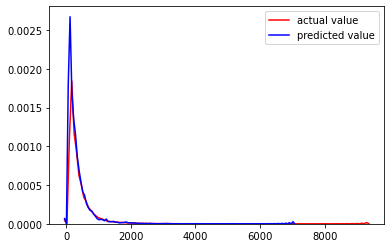

In [86]:
import seaborn as sns
ax1=sns.distplot(y_test,hist=False, color="r", label="actual value")
sns.distplot(y_pred1,hist=False, color="b", label="predicted value", ax=ax1)

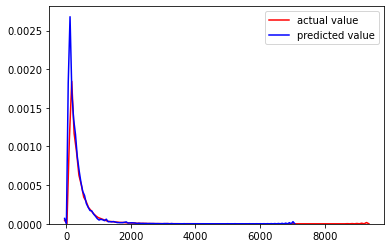

In [87]:
import seaborn as sns
ax1=sns.distplot(y_test,hist=False, color="r", label="actual value")
sns.distplot(y_pred2,hist=False, color="b", label="predicted value", ax=ax1)

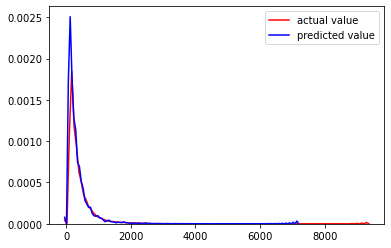

In [88]:
import seaborn as sns
ax1=sns.distplot(y_test,hist=False, color="r", label="actual value")
sns.distplot(y_pred6,hist=False, color="b", label="predicted value", ax=ax1)

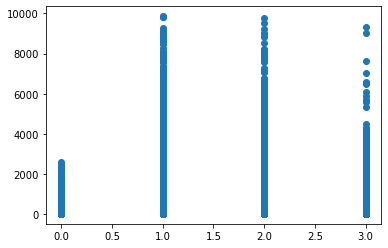

In [41]:
plt.scatter(trainfinal["cuisine"],trainfinal['num_orders'])

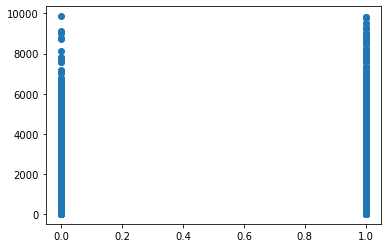

In [42]:
plt.scatter(trainfinal["homepage_featured"],trainfinal['num_orders'])

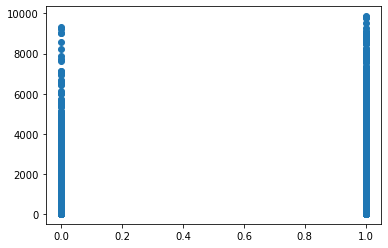

In [43]:
plt.scatter(trainfinal["emailer_for_promotion"],trainfinal['num_orders'])

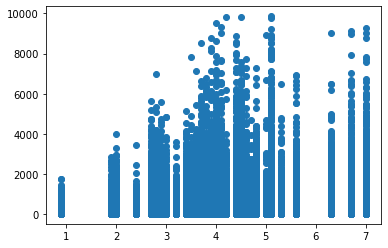

In [30]:
plt.scatter(trainfinal["op_area"],trainfinal['num_orders'])

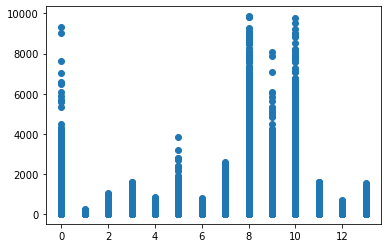

In [31]:
plt.scatter(trainfinal["category"],trainfinal['num_orders'])

In [32]:
trainfinal["category"]

0         0
1         0
2         0
3         0
4         0
         ..
456543    4
456544    4
456545    4
456546    4
456547    4
Name: category, Length: 456526, dtype: int64

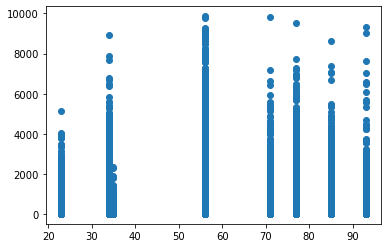

In [33]:
plt.scatter(trainfinal["region_code"],trainfinal['num_orders'])

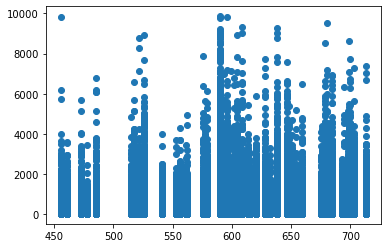

In [34]:
plt.scatter(trainfinal["city_code"],trainfinal['num_orders'])

# StandardScaler 

In [38]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X1=sc.fit_transform(X)
X1

array([[-0.35, -1.17, -0.51, ..., -1.18, -0.03,  0.69],
       [-0.35, -1.17, -0.51, ..., -1.18, -0.03,  0.69],
       [-0.35, -1.17, -0.51, ..., -1.18, -0.03,  0.69],
       ...,
       [-0.35,  0.86, -0.51, ..., -0.28,  1.16, -1.94],
       [-0.35,  0.86, -0.51, ..., -0.28,  1.16, -1.94],
       [-0.35,  0.86, -0.51, ..., -0.28,  1.16, -1.94]])

In [35]:
from joblib import dump
dump(sc,"scalar2.save")

['scalar2.save']

In [39]:
print(X1.shape)
print(Y.shape)

(456526, 10)
(456526,)


In [40]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y, test_size=0.2)

In [43]:
from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor(n_estimators = 200, random_state = 0)
reg2.fit(X_train1, y_train1)
y_pred3 = reg2.predict(X_test1)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test1.reshape(len(y_test1),1)),1))

[[ 39.44  26.  ]
 [156.39 404.  ]
 [ 92.48  80.  ]
 ...
 [433.75 310.  ]
 [ 20.6   15.  ]
 [679.47 215.  ]]


In [53]:
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test1, y_pred3)))

RMSLE: 55.535443756956326


In [41]:
from sklearn.tree import DecisionTreeRegressor
reg3 = DecisionTreeRegressor(random_state = 2)
reg3.fit(X_train1, y_train1)
y_pred4 = reg3.predict(X_test1)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test1.reshape(len(y_test1),1)),1))

[[ 39.1   26.  ]
 [156.46 404.  ]
 [ 92.44  80.  ]
 ...
 [435.51 310.  ]
 [ 20.55  15.  ]
 [678.94 215.  ]]


In [54]:
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test1, y_pred4)))

RMSLE: 55.66142266092512


In [44]:
from sklearn.metrics import r2_score
r2_score(y_test1, y_pred3)

0.748520698083126

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test1, y_pred4)

0.7404712930049608

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =reg2 , X = X_train1, y = y_train1, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [44]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator =reg3 , X = X_train1, y = y_train1, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.55 %
Standard Deviation: 0.68 %


In [34]:
import pickle
pickle.dump(reg2,open('decision2.pkl','wb'))

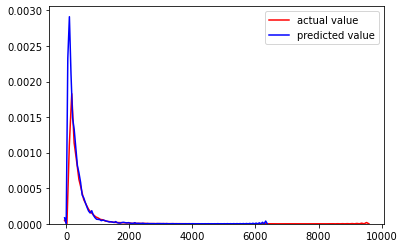

In [83]:
import seaborn as sns
ax1=sns.distplot(y_test1,hist=False, color="r", label="actual value")
sns.distplot(y_pred3,hist=False, color="b", label="predicted value", ax=ax1)

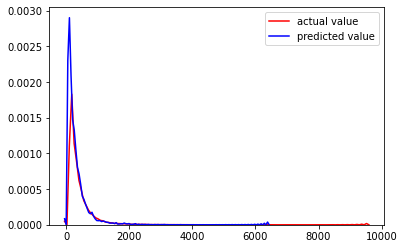

In [84]:
import seaborn as sns
ax1=sns.distplot(y_test1,hist=False, color="r", label="actual value")
sns.distplot(y_pred4,hist=False, color="b", label="predicted value", ax=ax1)

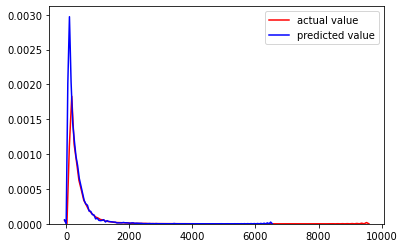

In [85]:
import seaborn as sns
ax1=sns.distplot(y_test1,hist=False, color="r", label="actual value")
sns.distplot(y_pred5,hist=False, color="b", label="predicted value", ax=ax1)

In [80]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train1, y_train1)
y_pred5 = KNN.predict(X_test1)


In [81]:
from sklearn.metrics import r2_score
r2_score(y_test1, y_pred5)

0.7204789922488374

In [82]:
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_test1, y_pred5)))

RMSLE: 59.205808090568304
